### Módulo 1: NumPy, computación científica con Python

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/gmonce/datascience/blob/master/src/Intro_NumPy.ipynb)

En este notebook veremos formas de trabajar con arrays multidimensionales (en especial vectores y matrices) en Python, utilizando la biblioteca fundamental para computación científica de Python: NumPy. Esta biblioteca es un componente imprescindible de prácticamente todas las bibliotecas de aprendizaje automático en Python, porque provee una forma eficiente de manipular matrices lo que, como veremos en el resto del curso, es clave para la gran mayoría de los métodos de aprendizaje automático modernos. 

**Referencias**

- [Introduction to NumPy]((https://sebastianraschka.com/pdf/books/dlb/appendix_f_numpy-intro.pdf)) - Sebastian Raschka
- [An introduction to NumPy and SciPy](https://sites.engineering.ucsb.edu/~shell/che210d/numpy.pdf) - M. Scott Shell

- [100 numpy exercises](https://github.com/rougier/numpy-100) - Nicolas Rougier


In [1]:
import numpy as np

## Este notebook fue elborado con la versión 1.18.1 de NumPy

np.__version__

'1.25.2'

### 0. Listas en Python

La forma básica de implementar arrays en Python son las _listas_: 

In [2]:
lista = [0, 'a', 2, 3]
print(lista)

[0, 'a', 2, 3]


Las listas son una estructura muy poderosa, porque permiten (como se vio en el ejemplo anterior) intercalar diferentes tipos de datos en la misma lista y no tienen una longitud fija. Existen operadores para seleccionar elementos, aplicar funciones a cada elemento, agregar y quitar elementos, etc. Por más información sobre listas, se puede consultar la documentación de python, o infinidad de tutoriales en Internet. El problema de las listas es que tanta flexibilidad se paga con eficiencia. NumPy surge como la forma de poder obtener esa eficiencia, aunque perdiendo flexibilidad. 

## 1. ndarrays

La estructura básica de NumPY es el array multidimensional (o `ndarray`).  Estos arrays están almacenados en secciones continuas de memoria, y por lo tanto pueden ser cacheados fácilmente. Pero, para que esto sea posible, los arrays deben cumplir dos restricciones: tener largo fijo, y tener elementos de un solo tipo. Esto permite que NumPy pueda utilizar los más eficientes loops escritos en C, evitando los chequeos de Python, haciendo que trabajar con ellos sea mucho más eficiente. 

Comencemos por crear un un array con 2 filas y 3 columnas (diremos que tiene dimensión 2x3, nombrando siempre primero las filas y luego las columnas): 

In [3]:
a = np.array([[1,2,3],[4,5,6]])
print(a)

[[1 2 3]
 [4 5 6]]


Los arrays son objetos, y tienen métodos asociados. Utilice el método `dtype` para conocer el tipo de los elementos de `a`

In [4]:
print(a.dtype)

int64


En el caso anterior, el constructor dedujo el tipo de los elementos, pero esto puede decirse explícitamente a través del parámetro `dtype`. Cree el mismo array que en el punto anterior, pero con tipo `float32`, y verifique el resultado.

In [5]:
a = np.array([[1,2,3],[4,5,6]], dtype=np.float32)
print(a)

b = np.array([[1,2],[3,4], [5,6],[7,8]], dtype=np.float32)
print (b)


[[1. 2. 3.]
 [4. 5. 6.]]
[[1. 2.]
 [3. 4.]
 [5. 6.]
 [7. 8.]]


La lista de tipos disponibles es muy grande. Consulte la [documentación](https://docs.scipy.org/doc/numpy/user/basics.types.html) de NumPy para la lista completa. 

Los arrays pueden tener hasta 32 dimensiones diferentes, pero aquí veremos solamente los que tienen dimensión 1 (vectores), y 2 (matrices). Todas las operaciones que veremos pueden extenderse a arrays de mayor dimensión (también conocidos como _tensores_). 

Si queremos conocer las dimensiones de una matriz, podemos utilizar el método `shape`, mientras que `ndim` nos dice el número de dimensiones, y `size` el número de elementos. Pruebe estos valores con los arrays que construimos previamente (como estamos utilizando Jupyter notebooks, simplemente escriba lo que quiere describir, sin utilizar `print`


In [6]:
a.shape, b.shape

((2, 3), (4, 2))

In [7]:
a.ndim, b.ndim

(2, 2)

In [8]:
a.size, b.size

(6, 8)

Podemos ver que los vectores son casos especiales de los arrays, con dimension 1. Incluso es posible definir arrays con dimensión 0 (¿cuáles son? ¿cómo los definiría?). Cree un caso de cada uno y verifique sus shapes. 

In [9]:
c=np.array(['a','b','c','d','e'])
scalar=np.array(42)
c, scalar

(array(['a', 'b', 'c', 'd', 'e'], dtype='<U1'), array(42))

In [10]:
c.shape, scalar.shape

((5,), ())

Hay diferentes formas para facilitar la creación de arrays: pruebe los métodos `np.ones`, `np.zeros`, `np.eye` y `np.diag`. ¿Puede ver qué hace cada uno?

In [11]:
np.ones((3,3))

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [12]:
np.diag((3,3,3))

array([[3, 0, 0],
       [0, 3, 0],
       [0, 0, 3]])

Si queremos crear un array con un rango, usamos `np.arange`, y si queremos generar puntos equiespaciados usamos `np.linspace` (muy útiles para crear gráficas)

In [13]:
np.linspace(0.,1.,num=10)

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

In [14]:
np.arange(10,20,2)

array([10, 12, 14, 16, 18])

Ejercicio: cree un vector con los puntos entre 0 y 50, con intervalos de 0.5. Calcule su cuadrado. Muestre gráficamente el resultado

In [16]:
import matplotlib.pyplot as plt

np.arange(0, 50, 0.5)

array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
        5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5,
       11. , 11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5, 16. ,
       16.5, 17. , 17.5, 18. , 18.5, 19. , 19.5, 20. , 20.5, 21. , 21.5,
       22. , 22.5, 23. , 23.5, 24. , 24.5, 25. , 25.5, 26. , 26.5, 27. ,
       27.5, 28. , 28.5, 29. , 29.5, 30. , 30.5, 31. , 31.5, 32. , 32.5,
       33. , 33.5, 34. , 34.5, 35. , 35.5, 36. , 36.5, 37. , 37.5, 38. ,
       38.5, 39. , 39.5, 40. , 40.5, 41. , 41.5, 42. , 42.5, 43. , 43.5,
       44. , 44.5, 45. , 45.5, 46. , 46.5, 47. , 47.5, 48. , 48.5, 49. ,
       49.5])

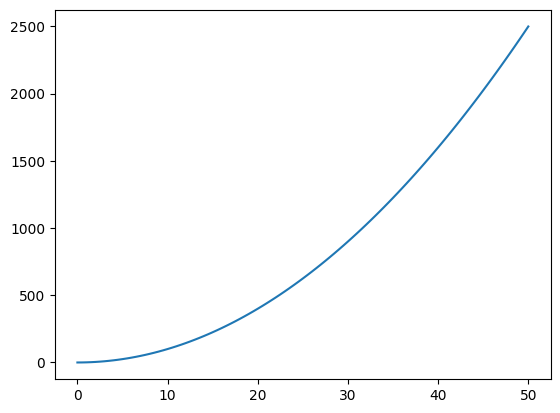

In [20]:
x=np.linspace(0.,50.,num=101)
y=x**2
plt.plot(x,y)

### 2.  Array indexing

Los arrays tienen "axis" (dimensiones). La primera dimensión son las filas, y la segunda las columnas (y así sucesivamente con nuevas dimensiones). Entonces, para conocer el elemento de un array de dos dimensiones (i.e. una matriz) a, debe referenciarse como `a[fila, columna]`. Los elementos se numeran (siguiendo el estándar de Python), comenzando en 0.

Construya una matriz de 4x4 con 1s en la diagonal y 0 en el resto. Asigne el valor 2 a la primer columna y segunda fila. Asigne el valor 3 a la columna 2, fila 1. 

In [25]:
z=np.eye(4)
z

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [26]:
z[1,0]=2
z[1,2]=3
z

array([[1., 0., 0., 0.],
       [2., 1., 3., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

Igual que en las listas de Python, pueden seleccionarse rangos de elementos, además de elementos individuales. La forma básica es i:j:k, donde i es el índice de inicio, j el de fin (no incluido), y k es el paso.

Por ejemplo, para seleccionar los elementos de las tres primeras filas, y de las columnas 1 y 2, utilizamos:

In [27]:
z[0:3,1:3]

array([[0., 0.],
       [1., 3.],
       [0., 1.]])

El indexing en Numpy permite seleccionar desde el final hacia atrás (utilizando índices negativos), y especificar un axis completa, utilizando la notación ':' (esto es, se seleccionan todos los elementos del axis). Por lo tanto, para seleccionar la última fila, basta poner: 

In [28]:
z[-1,:]

array([0., 0., 0., 1.])

### 3. Funciones universales y broadcasting

Las funciones matemáticas en NumPy tienen un comportamiento muy informe: se aplican a todos los elementos del array. Esto hace que prácticamente nunca sea necesario iterar por los arrays. Por ejemplo, si queremos saber la raíz cuadrada de cada elemento de z, simplemente hacemos:

In [29]:
np.sqrt(z)

array([[1.        , 0.        , 0.        , 0.        ],
       [1.41421356, 1.        , 1.73205081, 0.        ],
       [0.        , 0.        , 1.        , 0.        ],
       [0.        , 0.        , 0.        , 1.        ]])

Si queremos sumarle 1 a todos los elementos de z, ¿qué tendríamos que hacer?

In [30]:
z+1

array([[2., 1., 1., 1.],
       [3., 2., 4., 1.],
       [1., 1., 2., 1.],
       [1., 1., 1., 2.]])

En el paso anterior, intervino uno de los aspectos más interesantes de NumPy: el _broadcasting_. Cuando una operación involucra dos elementos con diferentes dimensiones (en el caso anterior, una matriz y un escalar), NumPy intenta "completar" las dimensiones de forma inteligente (en el caso anterior, transformando el escalar 1 en una matriz de 3x3 con 1s. 

Pruebe sumar una matriz con dos filas y una columnas y una con tres filas y dos columnas y analice el resultado. ¿Qué pasa si sumo una matriz con tres filas y dos columnas a la anterior?

In [31]:
a=np.ones((2,1))
b=np.ones((2,2))

a+b

array([[2., 2.],
       [2., 2.]])

In [24]:
# c=np.ones((3,2)) Esto no funciona!
# a+b+c

Siempre que se aplica una función universal, se aplica por defecto a todos los elementos del array. Por ejemplo, la siguiente función suma todos los elementos de la matriz z

In [32]:
np.sum(z)

9.0

Si lo que queremos es sumar los elementos de cada columna, agregamos el parámetro axis=0 al método, para indicarle que se quiere sumar, en cada columna, el elemento de cada fila (recordamos que el axis 0 es el que se mueve por las filas).

In [33]:
print(z)
np.sum(z, axis=0)

[[1. 0. 0. 0.]
 [2. 1. 3. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


array([3., 1., 4., 1.])

Por supuesto, para sumar en cada filas, indicamos la segunda axis. Utilizaremos una sintaxis alternativa en este caso: cada array es un objeto con sus propios métodos. Existen muchas funciones universales en NumPy, pruebe varias de ellas y verifique que su funcionamiento es homogéneo.

In [34]:
z.sum(axis=1)

array([1., 6., 1., 1.])

### 4. Operaciones de Comparación y Máscaras

Una forma adicional de indexar un array es a través de una _máscara_: un vector Booleano que indica qué elementos del array elegir y cuáles descartar.

In [35]:
# Especifico el vector original
a=np.array([1,2,3,4,5,6,7,8])
mask=np.array([True, False, True, True, True, False, False, False])

a[mask]


array([1, 3, 4, 5])

Esto no parece muy interesante, pero se vuelve muy potente cuando vemos que existen operaciones de comparación que devuelven vectores booleanos para los elementos que cumplen una cierta condición:

In [36]:
a>4

array([False, False, False, False,  True,  True,  True,  True])

In [37]:
a[a>4]

array([5, 6, 7, 8])

Es posible combinar condiciones on operaciones booleanas & (and) y | (or):

In [38]:
a[(a>4) & (a%3==0)]

array([6])

Se puede utilizar también la función `np.where` para indicar: si se cumple una condición del elemento, devolver x, y, en caso contrario devolver y:

In [39]:
np.where(z>1,1,0)

array([[0, 0, 0, 0],
       [1, 0, 1, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

### 5. Reshaping y concatenación

NumPy provee formas de cambiar la forma a un array. Esto es muy importante porque, aunque los arrays tienen tamaño fijo, su forma puede cambiar sin necesidad de tener que copiar a un nuevo espacio de memoria los valores (algo que podría ser muy costoso en el caso de arrays muy grandes).

In [40]:
zprima=z.reshape((8,2))
zprima

array([[1., 0.],
       [0., 0.],
       [2., 1.],
       [3., 0.],
       [0., 0.],
       [1., 0.],
       [0., 0.],
       [0., 1.]])

Tenga en cuenta que las operaciones sobre arrays en NumPy generalmente devuelven una _vista_ nueva (es decir, no se hace una copia). En el ejemplo anterior, verificamos la forma de z.

In [41]:
z

array([[1., 0., 0., 0.],
       [2., 1., 3., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [42]:
np.may_share_memory(z,zprima)

True

z y zprima son diferentes vistas sobre la misma zona de memoria.  Esto es muy importante desde el punto de vista de la eficiencia. 

¿Qué pasa si queremos agregar una nueva dimensión a las que tiene z? Por ejemplo, hacer reshape a (2,2,2,2).

In [43]:
zsegunda=z.reshape((2,2,2,2))
zsegunda

array([[[[1., 0.],
         [0., 0.]],

        [[2., 1.],
         [3., 0.]]],


       [[[0., 0.],
         [1., 0.]],

        [[0., 0.],
         [0., 1.]]]])

Podemos utilizar -1 en un axis para que NumPy asegure que el número total de elementos se mantenga:

In [44]:
ztercera=z.reshape((2,2,-1))
ztercera

array([[[1., 0., 0., 0.],
        [2., 1., 3., 0.]],

       [[0., 0., 1., 0.],
        [0., 0., 0., 1.]]])

Si queremos concatenar dos arrays, usamos `np.concatenate`. Ojo: esto puede ser ineficiente, porque devuelve una copia (ya que cambia el tamaño total). Como antes, el parámetro `axis` permite especificar por qué dimensión deben "pegarse" los arrays. 

In [45]:
# Por defecto, se pega por axis=0, es decir por las filas
np.concatenate((z,z))

array([[1., 0., 0., 0.],
       [2., 1., 3., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [2., 1., 3., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [46]:
np.concatenate((z,z), axis=1)

array([[1., 0., 0., 0., 1., 0., 0., 0.],
       [2., 1., 3., 0., 2., 1., 3., 0.],
       [0., 0., 1., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 1.]])

### 6. Álgebra lineal

NumPy provee funciones básicas de álgebra lineal. Hasta ahora hemos visto cómo crear y manipular vectores y matrices. Veamos algunas operaciones algebraicas que podemos aplicar. 

Tengamos primero en cuenta que los arrays unidimensionales en Python pueden verse como matrices 1xn (es decir, con una fila y n columnas): 

In [40]:
a=np.array([1,2,3,4])
a.shape

(4,)

In [41]:
w=z[:3,:]
w

array([[1., 0., 0., 0.],
       [2., 1., 3., 0.],
       [0., 0., 1., 0.]])

Para sumar dos matrices, sus tamaños deben ser compatibles, o permitir hacer broadcasting. Y luego, la operación se hace elemento a elemento

In [42]:
w+a

array([[2., 2., 3., 4.],
       [3., 3., 6., 4.],
       [1., 2., 4., 4.]])

In [43]:
w.shape, a.shape, (w+a).shape

((3, 4), (4,), (3, 4))

In [44]:
np.sum(w+a) #Oops.}, ¿qué pasó?

38.0

In [45]:
#Es posible multiplicar un escalar por una matriz
w*8

array([[ 8.,  0.,  0.,  0.],
       [16.,  8., 24.,  0.],
       [ 0.,  0.,  8.,  0.]])

Una operación muy importante es el producto  entre matrices. Dado $A(n,p)$ y $B(p,m)$, $A.B=C$, donde $C=((c_{ij}))$ and $c_{ij}=\Sigma_{h=1}^p a_{ih}b_{hj}$

In [46]:
# np.dot(a,w) # No funciona

In [47]:
np.dot(w,a) # funciona... pero, ¿está bien?

array([ 1., 13.,  3.])

Para entender por qué ambos casos funcionan, recordemos que los array 1D de NumPy pueden _verse_ como matrices de una sola fila, pero, en realidad, NumPy es más "inteligente" y lo rota para que coincida con la última _axis_ de la matriz de entrada (en este caso, 4). Veamos cómo luce `a.transpose()`

In [48]:
a.transpose()

array([1, 2, 3, 4])

Tal vez esperábamos un "array columna", pero tal concepto no existe. Debemos para eso aumentar una dimensión, para tener una matrix (4,1). El operador `np.newaxis` nos permite hacerlo:

In [49]:
a[:,np.newaxis]

array([[1],
       [2],
       [3],
       [4]])

Observemos que, si la nueva dimensión la creamos en las filas, en realidad obtenemos una matrix de dimensión (1,4) (que no es lo mismo que el array original, aunque lo parezca)

In [50]:
a[np.newaxis,:].shape,a[np.newaxis,:]


((1, 4), array([[1, 2, 3, 4]]))

Si multiplicamos dos vectores, obtenemos simplemente su producto interno:

In [51]:
a=[1,2,3,4]
b=[-1,1,2,1]
np.dot(a,b)

11

### 7. Polinomios

NumPy permite trabajar directamente con polinomios. Un polinomio puede definirse como un vector y, por ejemplo, obtener su raíces utilizando el método `np.roots`. Por ejemplo, para obtener las raices (complejas) del polinomio $x^2 + 1$. 

In [52]:
np.roots([1,0,1])

array([-0.+1.j,  0.-1.j])

A la inversa, podemos obtener, a partir de las raíces polinomiales, los coeficientes del polinomio

In [53]:
np.poly([0,2,4])

array([ 1., -6.,  8.,  0.])

En este caso, el resultado es $x^3 -6x^2 + 8x$

Podemos también evaluar un polinomio en un punto dado. Verifiquemos que, efectivamente, 2 es una raíz del polinomio obtenido en el paso anterior.

In [54]:
np.polyval([1,-6,8,0], 2)

0

Solo utilizando NumPy es posible ajustar un polinomio de cualquier orden espeficiado a un conjunto de valores dados (utilizando el método de mínimos cuadrados). Para ello, utilizamos el método `np.polyfit`, especificando las coordenadas x e y de cada punto a interpolar. Por ejemplo, para interpolar los puntos (0,0), (1,1.2), (2.1,4.1) con un polinomio de orden 2:

In [55]:
fit=np.polyfit([0,1,2.1],[0,1.2,4.1],2)
print(fit)

[ 6.83982684e-01  5.16017316e-01 -4.65903537e-16]


### 8. Números aleatorios

NumPy incluye rutinas para la generación de números pseudoaleatorios, que se generan en forma determinista a partir de una semilla, pero que tienen propiedades similares a una secuencia realmente aleatoria. El módulo `random` permite acceder a las rutinas adecuadas. 

Lo primero que debemos hacer es setear la semilla (al menos, si queremos que el proceso sea reproducible)

In [56]:
np.random.seed(42)

Con esto, podemos, por ejemplo, generar una array de números aleatorios con distribución U\[0,1) (uniforme entre 0 y 1), o una matriz,... o un escalar

In [57]:
np.random.rand(5)

array([0.37454012, 0.95071431, 0.73199394, 0.59865848, 0.15601864])

In [58]:
np.random.rand(2,2)


array([[0.15599452, 0.05808361],
       [0.86617615, 0.60111501]])

In [59]:
np.random.rand()

0.7080725777960455

Si queremos especificar el rango, usamos `randint` (con mínimo y máximo del rango como argumentos)

In [60]:
np.random.randint(5)

4

Si queremos especificar otras distribuciones, en el módulo hay disponibles muchos generadores diferentes. Por ejemplo: 

In [61]:
np.random.normal(0, 1)

-0.580878134023515

Genera un número extraído de una distribución gaussiana con media 0 y desviación estándar 1.

Si queremos más de un número, utilizamos el parámetro `size`:

In [62]:
np.random.normal(0,1,size=10)

array([-0.52516981, -0.57138017, -0.92408284, -2.61254901,  0.95036968,
        0.81644508, -1.523876  , -0.42804606, -0.74240684, -0.7033438 ])

Una función interesante del módulo es `shuffle`, que permite permutar aleatoriamente una lista

### 9. Màs NumPy

NumPy provee muchas funciones para álgebra lineal (`np.linalg`), ordenamiento y búsqueda (`np.sort`), estadísticas básicas, entre muchas otras. Todas utilizan los arrays aquí presentados, y la misma lógica de utilizar funciones universales como las que se presentaron.  Es sin duda la biblioteca más importante del ecosistema de Python para ciencia de datos, y entender sus fundamentos facilita muchìsimo el trabajo posterior, especialmente para las técnicas de aprendizaje automático. La biblioteca SciPy se apoya en NumPy para proveer funciones de computación científica más complicadas. Otras bibliotecas, Matplotlib, Pandas, Scikit-learn, Tensorflow, Keras, también utilizan en NumPy para sus computaciones básicas. 